# Conceptual
## Explain how k-fold cross-validation is implemented.
### **k-Fold Cross-Validation** is implemented as follows

1. **Split the Dataset**:
   The full dataset is randomly divided into **k approximately equal-sized subsets**, called *folds*.

2. **Iterative Model Fitting and Validation**:
   For each of the *k* iterations:

   * One of the *k* folds is designated as the **validation set**.
   * The **model is trained** on the remaining *k−1* folds.
   * The **performance (e.g., MSE for regression or error rate for classification)** is recorded on the validation fold.

3. **Aggregate the Results**:
   After all *k* folds have served as validation sets once, the **performance metrics** from each fold are **averaged** to produce the final cross-validation estimate.

---

## What are the advantages and disadvantages of k-fold crossvalidation relative to:
### The validation set approach?
#### **Advantages of k-Fold CV over the Validation Set Approach**

1. **Lower Variance in Test Error Estimates**
    *  Becuse the validation set approach depends heavily on how the data is split. Results can vary a lot depending on which points are in the training vs. validation sets. in contrast to k-Fold CV uses multiple splits and averages the results as i mentioned above, leading to **more stable and reliable performance estimates**
    
2. **Better Use of Data**

   * The validation set approach only trains on a subset of the data (the training set), wasting data that could help model fitting. while the k-Fold uses the whole data for both traning and validation.

3. **Less Overfitting Risk in Model Selection**

   * When tuning hyperparameters or selecting features, k-Fold CV gives a more accurate estimate of performance, reducing the risk of overfitting to one specific validation split. since the validation data keep rotating

---

#### **Disadvantages of k-Fold CV Compared to the Validation Set Approach**

1. **Higher Computational Cost**

   * k-Fold CV involves training the model **k times** (once per fold), whereas the validation set approach trains it only once. This makes k-Fold CV takes more time and computation power

---
### LOOCV?


### **Advantages of k-Fold CV over LOOCV**

1. **Lower Variance in Test Error Estimate**

   * LOOCV trains on nearly identical datasets (only one observation is left out each time), which leads to **highly correlated models**, This correlation makes the **average error estimate from LOOCV high in variance**, while k-Fold CV trains on more distinct splits, reducing correlation and thus typically yielding a **more accurate and lower-variance test error estimate**.

2. **Much Faster Computation**

   * LOOCV trains the model **n times** (once per data point), which is computationally expensive, k-Fold CV only trains the model **k times** , making it faster and more computation efftint.

---

###  **Disadvantages of k-Fold CV Compared to LOOCV**

1. **Slightly Higher Bias**

   * LOOCV uses **n−1** samples for training in each fold, which is nearly the entire dataset, so its bias is lower, k-Fold CV uses only **(k−1)/k × n** samples in each training fold, leading to **slightly higher bias** compared to LOOCV.

---



# Practical
## Overview of the steps
1. Loading the data and getting an overview of the data
2. Estimating the standard error of parameters of a Linear Regression Model
3. Estimating the standard error of parameters of a Quadratic Regression Model
##Steps in detail
Loading the data and getting an overview of the data
Load the data file Auto.csv .


In [20]:
import pandas as pd
df = pd.read_csv("dataset/Auto.csv", index_col=0)

Display the number of predictors and possible responses and their names:


In [21]:
print(df.shape[1])
print(df.columns.tolist())

9
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']


Print a statistic summary of the predictors and responses:

In [22]:
print(df.describe(include='all'))

               mpg   cylinders  displacement  horsepower       weight  \
count   392.000000  392.000000    392.000000  392.000000   392.000000   
unique         NaN         NaN           NaN         NaN          NaN   
top            NaN         NaN           NaN         NaN          NaN   
freq           NaN         NaN           NaN         NaN          NaN   
mean     23.445918    5.471939    194.411990  104.469388  2977.584184   
std       7.805007    1.705783    104.644004   38.491160   849.402560   
min       9.000000    3.000000     68.000000   46.000000  1613.000000   
25%      17.000000    4.000000    105.000000   75.000000  2225.250000   
50%      22.750000    4.000000    151.000000   93.500000  2803.500000   
75%      29.000000    8.000000    275.750000  126.000000  3614.750000   
max      46.600000    8.000000    455.000000  230.000000  5140.000000   

        acceleration        year      origin         name  
count     392.000000  392.000000  392.000000          392  
uni

Display the number of data points:


In [23]:
print(df.shape[0])

392


Display the data in a table (subset of rows is sufficient):


In [24]:
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
1  18.0          8         307.0         130    3504          12.0    70   
2  15.0          8         350.0         165    3693          11.5    70   
3  18.0          8         318.0         150    3436          11.0    70   
4  16.0          8         304.0         150    3433          12.0    70   
5  17.0          8         302.0         140    3449          10.5    70   

   origin                       name  
1       1  chevrolet chevelle malibu  
2       1          buick skylark 320  
3       1         plymouth satellite  
4       1              amc rebel sst  
5       1                ford torino  


Compute the pairwise correlation of the predictors in the data set.


Correlation matrix ($r):
               mpg  cylinders  displacement  horsepower  weight  acceleration  \
mpg           1.00      -0.78         -0.81       -0.78   -0.83          0.42   
cylinders    -0.78       1.00          0.95        0.84    0.90         -0.50   
displacement -0.81       0.95          1.00        0.90    0.93         -0.54   
horsepower   -0.78       0.84          0.90        1.00    0.86         -0.69   
weight       -0.83       0.90          0.93        0.86    1.00         -0.42   
acceleration  0.42      -0.50         -0.54       -0.69   -0.42          1.00   
year          0.58      -0.35         -0.37       -0.42   -0.31          0.29   
origin        0.57      -0.57         -0.61       -0.46   -0.59          0.21   

              year  origin  
mpg           0.58    0.57  
cylinders    -0.35   -0.57  
displacement -0.37   -0.61  
horsepower   -0.42   -0.46  
weight       -0.31   -0.59  
acceleration  0.29    0.21  
year          1.00    0.18  
origin       

C:\Users\anass\AppData\Local\Temp\ipykernel_6868\1984784157.py:43: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(p_matrix.applymap(lambda x: f"{x:.1e}"), end='\n\n')


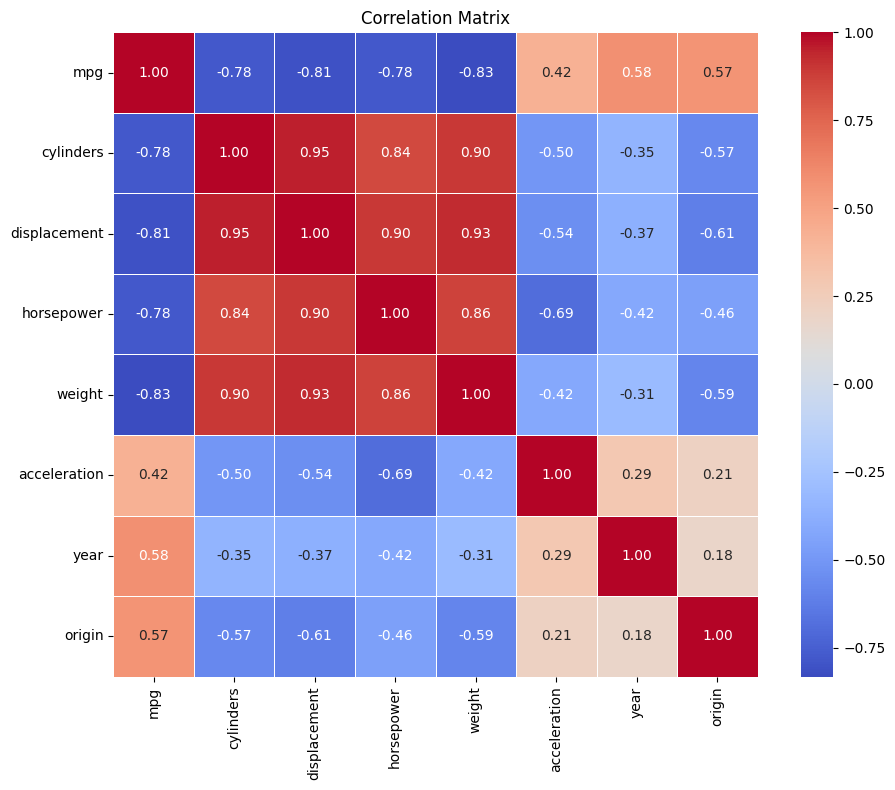

In [25]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the 'name' column
df_numeric = df.drop(columns=['name'])

# Initialize matrices
cols = df_numeric.columns
n = len(cols)
r_matrix = pd.DataFrame(np.zeros((n, n)), columns=cols, index=cols)
p_matrix = pd.DataFrame(np.zeros((n, n)), columns=cols, index=cols)
symbol_matrix = pd.DataFrame('', columns=cols, index=cols)

# Symbol legend cutoffs
legend = [(0.95, 'B'), (0.9, '*'), (0.8, '+'), (0.6, ','), (0.3, '.'), (0, ' ')]

# Compute pairwise correlations
for i in range(n):
    for j in range(n):
        if i <= j:
            r, p = pearsonr(df_numeric[cols[i]], df_numeric[cols[j]])
            r_matrix.iloc[i, j] = r_matrix.iloc[j, i] = r
            p_matrix.iloc[i, j] = p_matrix.iloc[j, i] = p
            # Assign symbols based on cutoff
            for cutoff, symbol in legend:
                if abs(r) >= cutoff:
                    symbol_matrix.iloc[i, j] = symbol_matrix.iloc[j, i] = symbol
                    break
        elif i == j:
            r_matrix.iloc[i, j] = 1
            p_matrix.iloc[i, j] = 0
            symbol_matrix.iloc[i, j] = '1'

# Print correlation matrix
print("Correlation matrix ($r):")
print(r_matrix.round(2), end='\n\n')

# Print p-values matrix
print("P-value matrix ($p):")
print(p_matrix.applymap(lambda x: f"{x:.1e}"), end='\n\n')

# Print symbol matrix
print("Symbolic correlation matrix ($sym):")
print(symbol_matrix, end='\n\n')

# Print legend
print("Legend:")
print("0 ‘ ’  0.3 ‘.’  0.6 ‘,’  0.8 ‘+’  0.9 ‘*’  0.95 ‘B’  1")

# Optional: visual heatmap of $r
plt.figure(figsize=(10, 8))
sns.heatmap(r_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [26]:
import statsmodels.api as sm

def boot_fn(data, indices):
    sample = data.iloc[indices]
    X = sm.add_constant(sample['horsepower'])
    y = sample['mpg']
    model = sm.OLS(y, X).fit()
    return model.params  

indices = list(range(len(df)))
coefficients = boot_fn(df, indices)

print(coefficients)


const         39.935861
horsepower    -0.157845
dtype: float64


The boot.fn() function can also be used in order to create bootstrap estimates for the
intercept and slope terms by randomly sampling from among the observations with
replacement. Here two examples where the sample() function creates different training
data sets based on the original Auto data.


In [27]:
np.random.seed(1)

indices1 = np.random.choice(range(len(df)), size=len(df), replace=True)
print(boot_fn(df, indices1))

indices2 = np.random.choice(range(len(df)), size=len(df), replace=True)
print(boot_fn(df, indices2))


const         39.658479
horsepower    -0.155898
dtype: float64
const         40.733271
horsepower    -0.163901
dtype: float64


Next, we use the boot() function to compute the standard errors of bootstrap
estimates for the intercept and slope terms.

In [28]:

n_bootstraps = 1000
boot_results = np.zeros((n_bootstraps, 2))

np.random.seed(1) 

for i in range(n_bootstraps):
    indices = np.random.choice(range(len(df)), size=len(df), replace=True)
    params = boot_fn(df, indices)
    boot_results[i] = params.values 


boot_means = boot_results.mean(axis=0)
boot_std = boot_results.std(axis=0)

print("Bootstrap results (1000 iterations):")
print(f"Original: Intercept = {coefficients.iloc[0]:.6f}, Slope = {coefficients.iloc[1]:.6f}")
print(f"Bias:     Intercept = {boot_means[0] - coefficients.iloc[0]:.6f}, Slope = {boot_means[1] - coefficients.iloc[1]:.6f}")
print(f"Std Err:  Intercept = {boot_std[0]:.6f}, Slope = {boot_std[1]:.6f}")


Bootstrap results (1000 iterations):
Original: Intercept = 39.935861, Slope = -0.157845
Bias:     Intercept = 0.027524, Slope = -0.000461
Std Err:  Intercept = 0.825266, Slope = 0.007136


This indicates that the bootstrap estimate for , and that the bootstrap
estimate for .
Statistic formulas can be used to compute the standard errors for the regression coefficients
in a linear model. In R these can be obtained using the summary() function on the
results of the fitted logistic regression model.


In [29]:
import statsmodels.api as sm

# Fit linear model: mpg ~ horsepower
X = sm.add_constant(df['horsepower'])
y = df['mpg']
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 11 May 2025   Prob (F-statistic):           7.03e-81
Time:                        22:24:04   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

This indicates that the standard error for , and that the bootstrap estimate for
.
SE(𝛽0
) = 0.72
SE(𝛽1
) = 0.0064

 From the correlation matrix, we observed strong linear relationships between mpg and several predictors like horsepower, displacement, weight, and cylinders. These patterns gave us reason to suspect that linear relationships were present in the data, but possibly with complexity or redundancy among predictors.

then fitted a simple linear regression model to predict mpg using only horsepower. The model yielded interpretable coefficients: an intercept of about 39.94 and a slope of -0.158, indicating that mpg tends to decrease as horsepower increases. then i calculated standard errors for these coefficients using the traditional OLS approach, which assumes a linear relationship, constant variance (homoskedasticity), and normally distributed residuals. According to OLS, the standard errors were 0.72 for the intercept and 0.0064 for the slope.

To test how reliable those estimates were, i then implemented a bootstrap procedure—sampling with replacement and refitting the model 1,000 times. The standard errors produced by this non-parametric method were noticeably larger: 0.83 for the intercept and 0.0071 for the slope. Although the coefficient estimates themselves remained stable, the bootstrap revealed greater uncertainty around them than the OLS method suggested.

This difference between the two methods is meaningful. The fact that the bootstrap estimates higher variability indicates that at least one of the assumptions underlying the OLS model may be violated. The most likely issue is that the relationship between mpg and horsepower isn’t perfectly linear; rather, it may contain curvature or other forms of non-linearity that the linear model can’t capture. Since the OLS method relies on model correctness for valid standard errors, it underestimates the true variability in this case.

Therefore, the bootstrap approach gives a more realistic estimate of standard error in the presence of potential non-linearity or other violations of linear regression assumptions. This suggests that the simple linear model we fit does not fully capture the underlying structure in the data, and that a more flexible model—perhaps including non-linear terms or transformations—would better reflect the true relationship.


## Estimating the Accuracy of a Quadratic Regression Model
Below the bootstrap standard error estimates and the standard linear regression estimates
that result from fitting the quadratic model to the data. Since this model provides a good fit
to the data, there is now a better correspondence between the bootstrap estimates of
SE(𝛽 ), , and .
̂ 
0 SE(𝛽 )
̂ 
1 SE(𝛽 )

In [30]:
def boot_fn_quad(data, indices):
    sample = data.iloc[indices]
    X = sample[['horsepower']].copy()
    X['horsepower_squared'] = X['horsepower'] ** 2
    X = sm.add_constant(X)
    y = sample['mpg']
    model = sm.OLS(y, X).fit()
    return model.params
n_bootstraps = 1000
boot_results_quad = np.zeros((n_bootstraps, 3))  # Intercept, horsepower, horsepower^2

np.random.seed(1)

for i in range(n_bootstraps):
    indices = np.random.choice(range(len(df)), size=len(df), replace=True)
    params = boot_fn_quad(df, indices)
    boot_results_quad[i] = params.values

boot_means_quad = boot_results_quad.mean(axis=0)
boot_std_quad = boot_results_quad.std(axis=0)
coefficients_quad = boot_fn_quad(df, list(range(len(df))))

print("Quadratic Model Bootstrap Results (1000 iterations):")
print(f"Original Coefficients:")
print(f"  Intercept       = {coefficients_quad.iloc[0]:.6f}")
print(f"  horsepower      = {coefficients_quad.iloc[1]:.6f}")
print(f"  horsepower^2    = {coefficients_quad.iloc[2]:.6f}\n")

print(f"Bootstrap Std Errors:")
print(f"  Intercept       = {boot_std_quad[0]:.6f}")
print(f"  horsepower      = {boot_std_quad[1]:.6f}")
print(f"  horsepower^2    = {boot_std_quad[2]:.6f}")
X = df[['horsepower']].copy()
X['horsepower_squared'] = X['horsepower'] ** 2
X = sm.add_constant(X)
y = df['mpg']

model_quad = sm.OLS(y, X).fit()
print(model_quad.summary())


Quadratic Model Bootstrap Results (1000 iterations):
Original Coefficients:
  Intercept       = 56.900100
  horsepower      = -0.466190
  horsepower^2    = 0.001231

Bootstrap Std Errors:
  Intercept       = 2.102325
  horsepower      = 0.033502
  horsepower^2    = 0.000121
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Sun, 11 May 2025   Prob (F-statistic):           5.40e-99
Time:                        22:24:06   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Typ

Compare again differences in the standard errors between the bootstrap estimates and the
statistic estimates of SE(𝛽 ), , and . 0 SE(𝛽 )1 SE(𝛽 )2

### Summary of Results

In this experiment, we fitted a **quadratic regression model** to predict `mpg` based on both `horsepower` and `horsepower²`, and then compared the **standard errors** estimated via two methods:

| Coefficient      | OLS Estimate | OLS Std. Error | Bootstrap Std. Error |
| ---------------- | ------------ | -------------- | -------------------- |
| Intercept (β₀)   | 56.9001      | 1.8004         | 2.1023               |
| Horsepower (β₁)  | -0.4662      | 0.0311         | 0.0335               |
| Horsepower² (β₂) | 0.001231     | 0.000122       | 0.000121             |

### Interpretation

In contrast to the earlier linear model, the quadratic regression provides a **much better fit** to the data, increasing the R² from about **0.606** to **0.688**. This suggests that the relationship between horsepower and fuel efficiency (mpg) is not perfectly linear — instead, the effect of horsepower on mpg **slows down** or **curves** as horsepower increases.

When comparing **standard errors**, we see that the estimates from **OLS and bootstrap now closely align** across all three coefficients. For instance:

* The bootstrap and OLS SEs for `horsepower` are 0.0335 vs. 0.0311.
* For `horsepower²`, they are essentially identical at ≈0.000121–0.000122.

This **tight agreement** tells us something important:
The quadratic model not only fits the data better in terms of explained variance, but it also **meets the assumptions of the OLS model more closely**. Unlike the linear model, where bootstrap SEs were clearly larger (signaling potential model misfit), the match here confirms that the residuals behave more like what OLS assumes — with stable variance and reasonably correct functional form.

The warning about a **high condition number (\~129,000)** reflects multicollinearity between `horsepower` and `horsepower²`, which is expected when including polynomial terms. However, it doesn't invalidate the model — it's just a caution that coefficients may become unstable or overly sensitive to small changes in data. Regularization or centering the predictors can help if this becomes a practical issue.

### Conclusion

By moving from a linear to a quadratic model, we captured more of the real structure in the data. The improved agreement between bootstrap and OLS standard errors supports the claim that this new model is a **better fit**, and the standard errors it reports can now be trusted more. This demonstrates how bootstrapping can be used not just to estimate uncertainty but also to diagnose and validate the quality of a model.
